### Импорты к работе

In [27]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

### Ссылки на результаты выборов для лабораторной работы

In [2]:
url1 = 'http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=178400312&tvd=27820001217428&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217428&type=222'
url2 = 'http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=178401812&tvd=27820001217432&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217432&type=222'
url3 = 'http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=178402412&tvd=27820001217440&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217440&type=222'
url_list = [url1, url2, url3]

### Метод для получения таблицы по url_list

In [3]:
def make_table(url_list):
    # берем левую таблицу с названиями строк
    n_table = pd.read_html(url_list[0], header=0, encoding='windows-1251')[6]
    
    # удаляем ненужные столбцы
    del n_table['Unnamed: 0']
    del n_table['Сумма']
    
    # переименновываем столбец
    n_table = n_table.rename(columns={"Unnamed: 1": "Names"})
    
    # соединяем правые таблицы в одну и присоединяем к левой с названиями
    for url in url_list:
        v_table = pd.read_html(url, header=0, encoding='windows-1251')[7]
        n_table = n_table.join(v_table)
    return n_table.drop(11).reset_index(drop=True)

### Все данные в одной таблице

In [4]:
table = make_table(url_list)

### Смотрим что находится в таблице

In [5]:
table.iloc[[0, 6, 11, 12, 13]]

,Names,УИК №199,УИК №200,УИК №201,УИК №202,УИК №203,УИК №204,УИК №205,УИК №206,УИК №207,...,УИК №399,УИК №400,УИК №401,УИК №403,УИК №404,УИК №405,УИК №406,УИК №407,УИК №408,УИК №409
0,"Число избирателей, внесенных в список избирате...",2097,2366,1659,1666,859,1792,2000,2017,1263,...,2078,1160,1825,668,638,346,381,466,201,115
6,"Число избирательных бюллетеней, содержащихся в...",496,583,373,406,143,440,523,529,396,...,557,401,487,68,308,335,205,370,120,113
11,Амосов Михаил Иванович,81 16.07%,75 12.76%,46 11.95%,63 15.37%,37 25.69%,69 15.33%,99 16.56%,88 13.90%,79 19.51%,...,109 19.29%,67 16.42%,77 15.62%,6 0.90%,8 1.25%,3 0.87%,10 3.24%,7 1.51%,17 8.46%,1 0.88%
12,Беглов Александр Дмитриевич,295 58.53%,368 62.59%,244 63.38%,282 68.78%,71 49.31%,296 65.78%,382 63.88%,424 66.98%,248 61.23%,...,357 63.19%,257 62.99%,344 69.78%,652 97.60%,595 93.26%,332 95.95%,282 91.26%,436 93.76%,140 69.65%,92 81.42%
13,Тихонова Надежда Геннадьевна,109 21.63%,125 21.26%,83 21.56%,54 13.17%,29 20.14%,77 17.11%,97 16.22%,107 16.90%,70 17.28%,...,85 15.04%,78 19.12%,51 10.34%,7 1.05%,22 3.45%,5 1.45%,7 2.27%,11 2.37%,35 17.41%,1 0.88%


### Метод для получения количество голосов кандидата(по номеру из таблицы) на каждом участке
#### 11 - Амосов; 12 - Беглов; 13 - Тихонова

In [6]:
def get_num_of_voi(num):
    tmp = []
    for i in range(1, len(table.iloc[[num]].values[0])):
        tmp.append(float(table.iloc[[num]].values[0][i].split()[1][:-1])) 
    return np.array(tmp)

amosov = get_num_of_voi(11)
beglov = get_num_of_voi(12)
tixonova = get_num_of_voi(13)

### Получение явки ( "Внесенные в список"/"Бюллетеней в ящике")

In [7]:
x = table.iloc[[0]].values[0][1:].astype(int)
y = table.iloc[[6]].values[0][1:].astype(int)
yavka = y/x * 100

### Зависимотсть голосов за кандидатов от явки

<IPython.core.display.Javascript object>


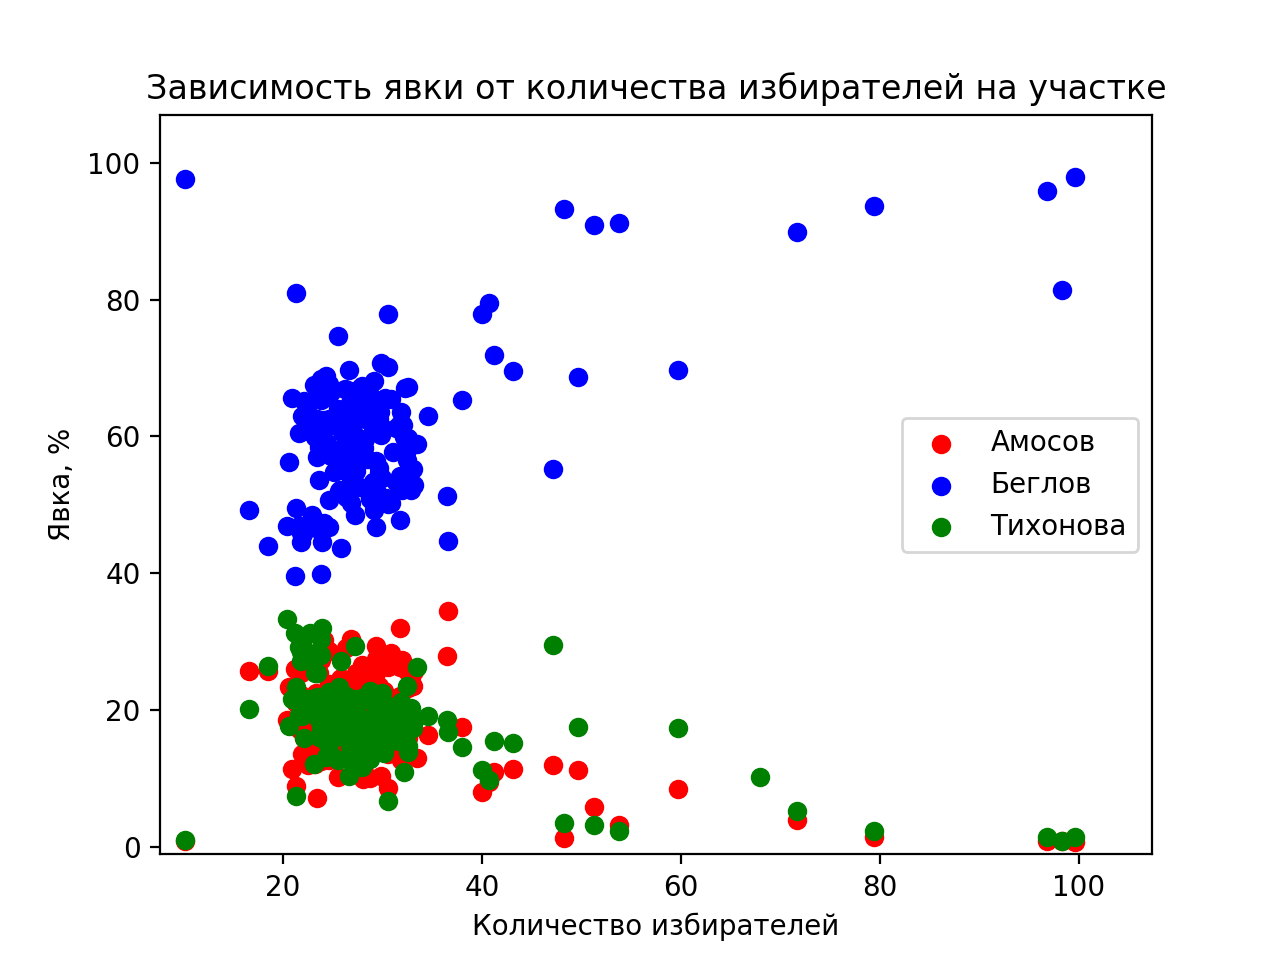

In [29]:
plt.scatter(yavka, amosov, color='red', label='Амосов')
plt.scatter(yavka, beglov, color='blue', label='Беглов')
plt.scatter(yavka, tixonova, color='green', label='Тихонова')
plt.title('Зависимость голосов за кандидатов от явки')
plt.xlabel('Явка, %')
plt.ylabel('Голоса, %')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


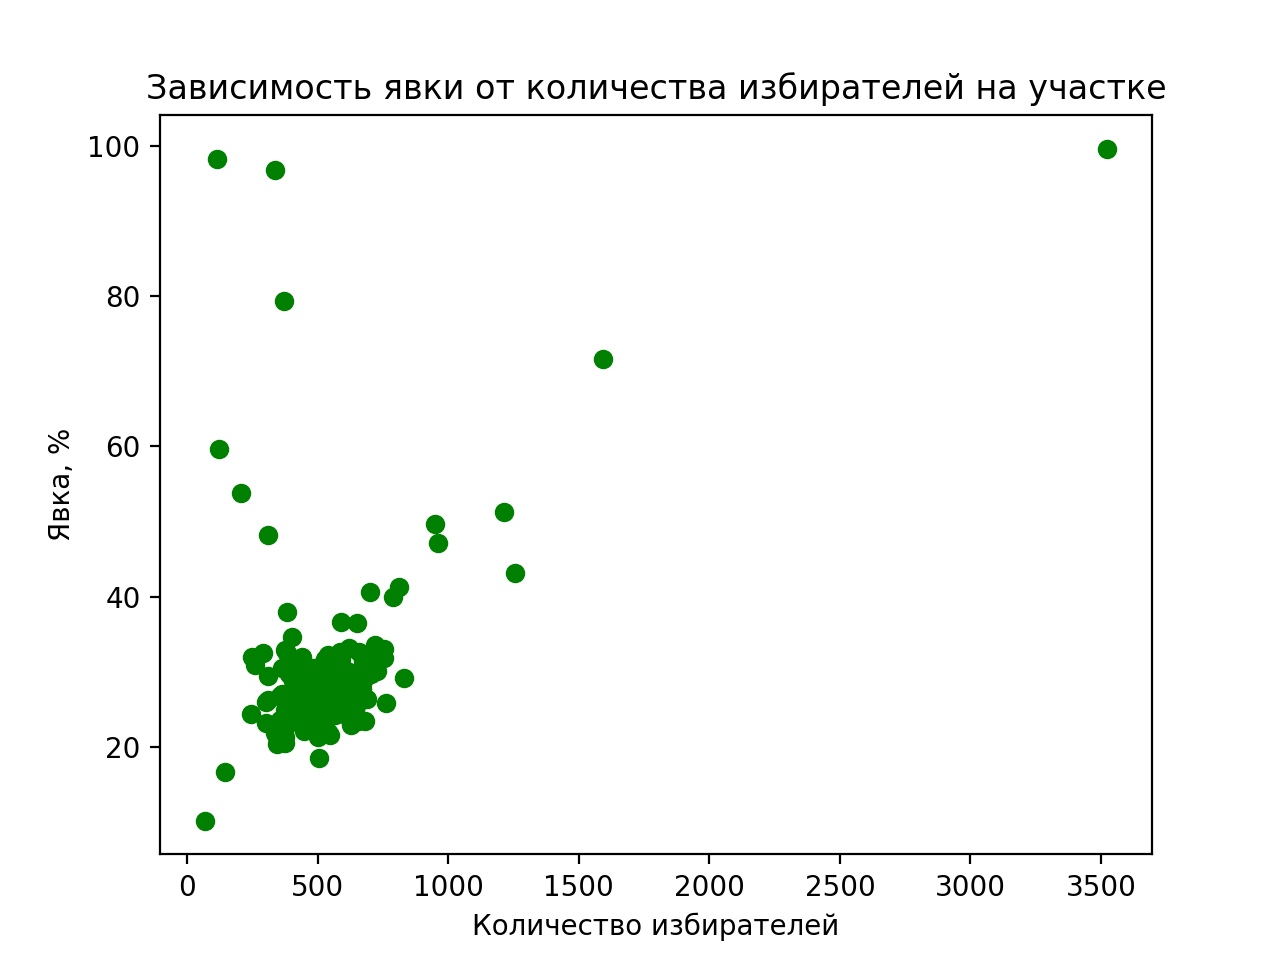

In [31]:
ppl_count = table.iloc[[6]].values[0][1:].astype(int)

plt.scatter(ppl_count, yavka, color="green")
plt.title('Зависимость явки от количества избирателей на участке')
plt.xlabel('Количество избирателей')
plt.ylabel('Явка, %')
plt.show()